## Student Performance Indicator


#### Machine learning Project

- Problem Statement
- Data Source
- Data Checks 
- Exploratory Data Analysis (EDA)
- Data Pre-Processing
- Model Training
- Choose the best model

# Problem statement
How is the student's performance (test scores) affected by variables such as Gender, Ethnicity, Parental level of education, Lunch, and Test preparation course?


# Data Source
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

In [36]:
# import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [37]:
# import the CSV dataset as Pandas DataFrame
df = pd.read_csv('data/stud.csv')

In [38]:
# display the first five rows
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
# display the shape
df.shape

(1000, 8)

In [9]:
# display the data types
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

# Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [40]:
# check missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [41]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [107]:
# check the null variables and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


In [42]:
# check the number of unique variables in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [43]:
# check the statistics 
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights
- The means are very close to each other - between 66 and 68.05;
- The standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is 10 and for reading is 17

In [44]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
# display the unique categories for each variable
print("Categories in 'gender' variable: ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [34]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print numerical and categorical columns
print('The dataset includes {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('The dataset includes {} categorical features: {}'.format(len(categorical_features), categorical_features))

The dataset includes 5 numerical features: ['math_score', 'reading_score', 'writing_score', 'total score', 'average']
The dataset includes 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [45]:
# total score
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
# average score
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [46]:
df.describe()

,math_score,reading_score,writing_score,total score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [47]:
# display the number of students with maximum scores in math, reading, writing
math_full = df[df['math_score'] == 100]['average'].count()
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full} students')
print(f'Number of students with full marks in Reading: {reading_full} students')
print(f'Number of students with full marks in Writing: {writing_full} students')

Number of students with full marks in Maths: 7 students
Number of students with full marks in Reading: 17 students
Number of students with full marks in Writing: 14 students


In [48]:
# dispaly the number of students with less than 20 in math, reading, and writing
math_less_20 = df[df['math_score'] <= 20]['average'].count()
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20} students')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20} students')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20} students')

Number of students with less than 20 marks in Maths: 4 students
Number of students with less than 20 marks in Reading: 1 students
Number of students with less than 20 marks in Writing: 3 students


Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

## Average Scores

Number of extreme outliers: 6
Number of left outliers: 6
Number of right outliers: 0
Minimum average: 9.00
Maximum average: 100.00
Lower bound for outliers: 29.33
Upper bound for outliers: 106.67


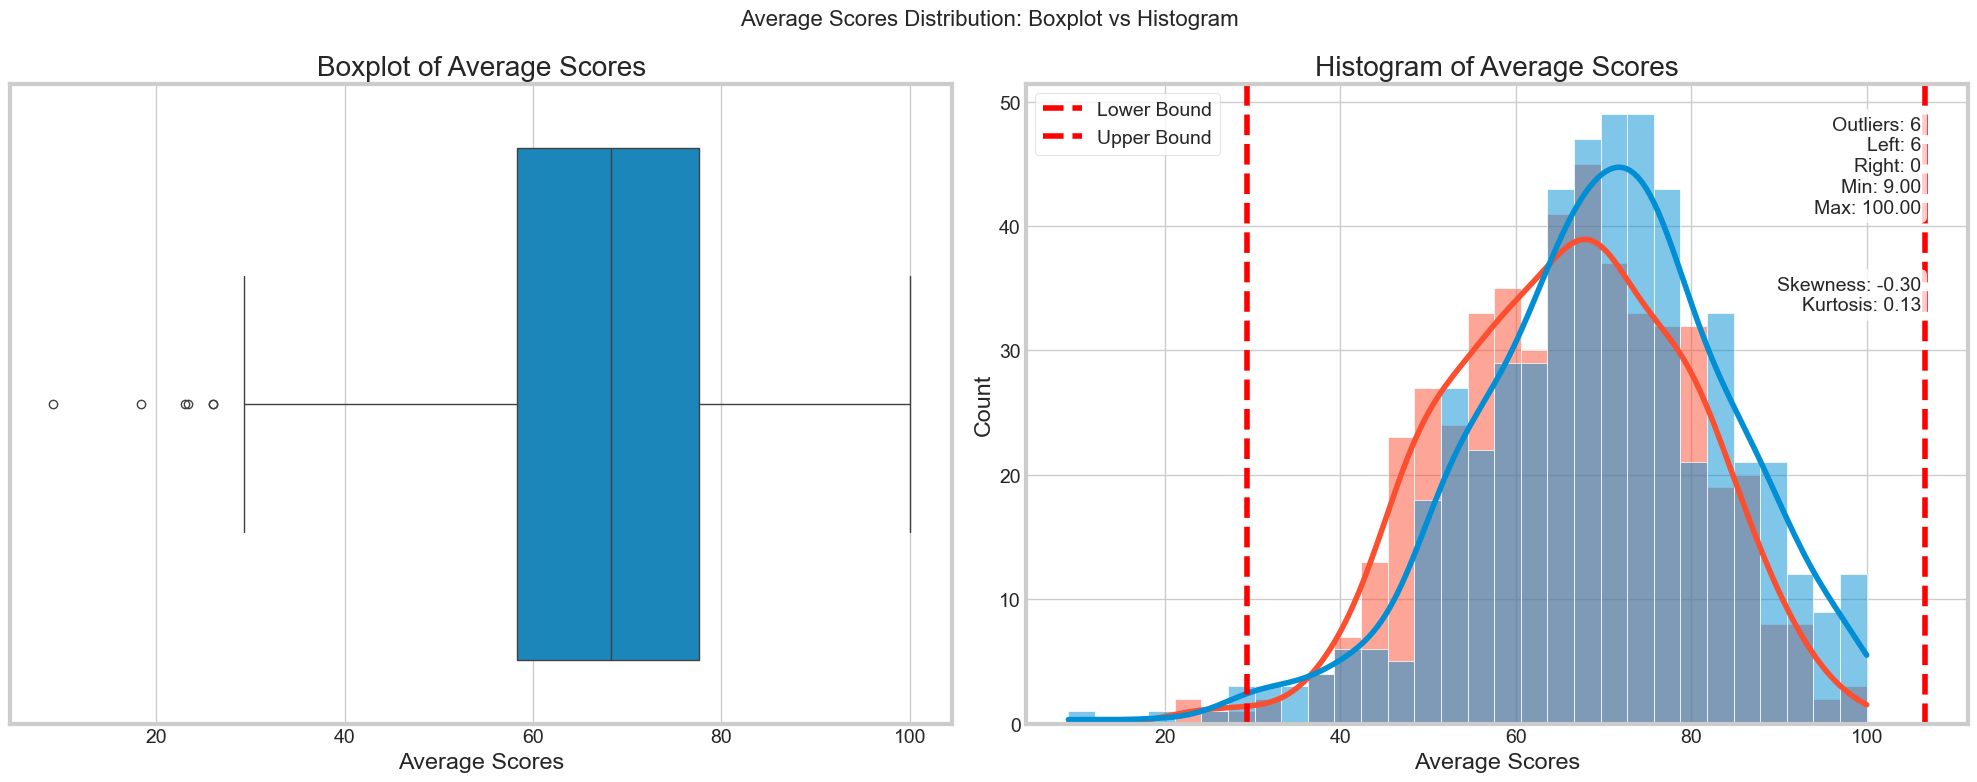


Summary of extreme outliers:
count     6.000000
mean     20.944444
std       6.489022
min       9.000000
25%      19.500000
50%      23.166667
75%      25.333333
max      26.000000
Name: average, dtype: float64

Overall summary statistics:
count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: average, dtype: float64


In [97]:
# Create boxplot and histogram side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Average Scores Distribution: Boxplot vs Histogram', fontsize=16)

# Boxplot
sns.boxplot(x=df['average'], ax=ax1)
ax1.set_title('Boxplot of Average Scores')
ax1.set_xlabel('Average Scores')

# Calculate outlier bounds
Q1 = df['average'].quantile(0.25)
Q3 = df['average'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Histogram
sns.histplot(data=df, x='average', kde=True, bins=30, ax=ax2, hue='gender')
ax2.set_title('Histogram of Average Scores')
ax2.set_xlabel('Average Scores')

# Add vertical lines for outlier bounds on histogram
ax2.axvline(lower_bound, color='red', linestyle='dashed', label='Lower Bound')
ax2.axvline(upper_bound, color='red', linestyle='dashed', label='Upper Bound')

# Identify extreme outliers
left_outliers = df[df['average'] < lower_bound]
right_outliers = df[df['average'] > upper_bound]
extreme_outliers = pd.concat([left_outliers, right_outliers])

# Print information about extreme outliers
print(f"Number of extreme outliers: {len(extreme_outliers)}")
print(f"Number of left outliers: {len(left_outliers)}")
print(f"Number of right outliers: {len(right_outliers)}")
print(f"Minimum average: {df['average'].min():.2f}")
print(f"Maximum average: {df['average'].max():.2f}")
print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

# Add text annotations
ax2.text(0.95, 0.95, f"Outliers: {len(extreme_outliers)}\nLeft: {len(left_outliers)}\nRight: {len(right_outliers)}\nMin: {df['average'].min():.2f}\nMax: {df['average'].max():.2f}",
         transform=ax2.transAxes, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Calculate and display skewness and kurtosis
skewness = df['average'].skew()
kurtosis = df['average'].kurtosis()
ax2.text(0.95, 0.70, f"Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}",
         transform=ax2.transAxes, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax2.legend()
plt.tight_layout()
plt.show()

# Print summary of extreme outliers
print("\nSummary of extreme outliers:")
print(extreme_outliers['average'].describe())

# Print overall summary statistics
print("\nOverall summary statistics:")
print(df['average'].describe())

Insights:
- the distribution is left skewed, the mean (67.77) is smaller than the median (68.33)
- left outliers, few students have very low scores
- 50% of the students scored between 58.33% and 77.66%
- female students' average scores are higher than those of male students

## Total Scores

Number of extreme outliers: 6
Number of left outliers: 6
Number of right outliers: 0
Minimum average: 9.00
Maximum average: 100.00
Lower bound for outliers: 88.00
Upper bound for outliers: 320.00


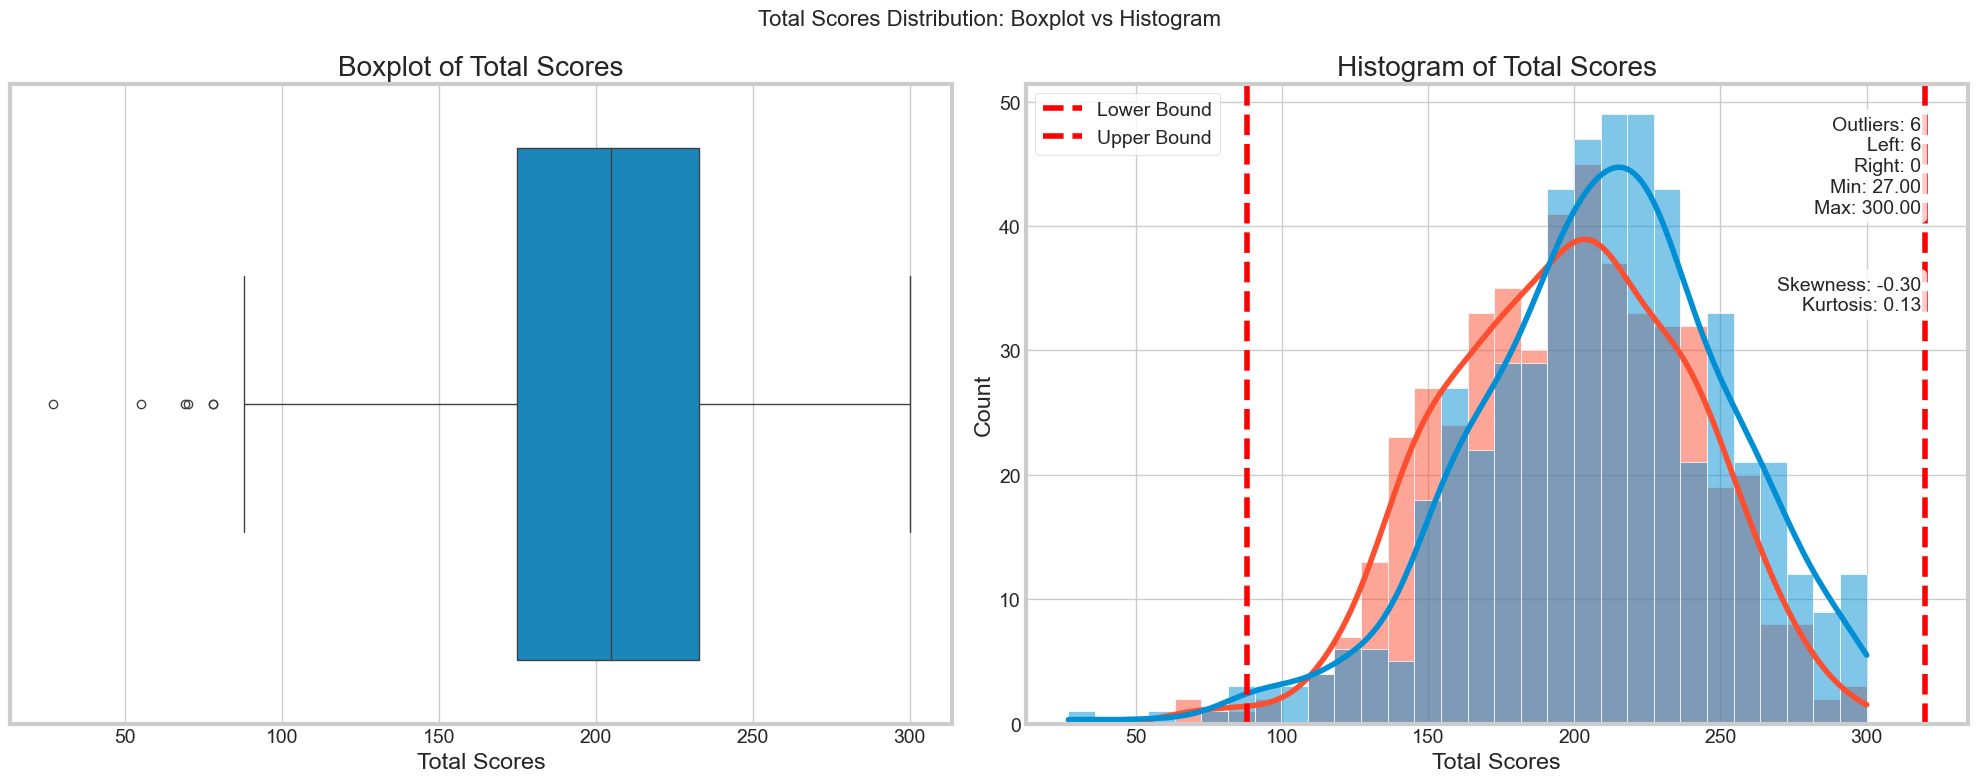


Summary of extreme outliers:
count     6.000000
mean     62.833333
std      19.467066
min      27.000000
25%      58.500000
50%      69.500000
75%      76.000000
max      78.000000
Name: total score, dtype: float64

Overall summary statistics:
count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: total score, dtype: float64


In [98]:
# Create boxplot and histogram side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Total Scores Distribution: Boxplot vs Histogram', fontsize=16)

# Boxplot
sns.boxplot(x=df['total score'], ax=ax1)
ax1.set_title('Boxplot of Total Scores')
ax1.set_xlabel('Total Scores')

# Calculate outlier bounds
Q1 = df['total score'].quantile(0.25)
Q3 = df['total score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Histogram
sns.histplot(data=df, x='total score', kde=True, bins=30, ax=ax2, hue='gender')
ax2.set_title('Histogram of Total Scores')
ax2.set_xlabel('Total Scores')

# Add vertical lines for outlier bounds on histogram
ax2.axvline(lower_bound, color='red', linestyle='dashed', label='Lower Bound')
ax2.axvline(upper_bound, color='red', linestyle='dashed', label='Upper Bound')

# Identify extreme outliers
left_outliers = df[df['total score'] < lower_bound]
right_outliers = df[df['total score'] > upper_bound]
extreme_outliers = pd.concat([left_outliers, right_outliers])

# Print information about extreme outliers
print(f"Number of extreme outliers: {len(extreme_outliers)}")
print(f"Number of left outliers: {len(left_outliers)}")
print(f"Number of right outliers: {len(right_outliers)}")
print(f"Minimum average: {df['average'].min():.2f}")
print(f"Maximum average: {df['average'].max():.2f}")
print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")

# Add text annotations
ax2.text(0.95, 0.95, f"Outliers: {len(extreme_outliers)}\nLeft: {len(left_outliers)}\nRight: {len(right_outliers)}\nMin: {df['total score'].min():.2f}\nMax: {df['total score'].max():.2f}",
         transform=ax2.transAxes, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Calculate and display skewness and kurtosis
skewness = df['total score'].skew()
kurtosis = df['total score'].kurtosis()
ax2.text(0.95, 0.70, f"Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}",
         transform=ax2.transAxes, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax2.legend()
plt.tight_layout()
plt.show()

# Print summary of extreme outliers
print("\nSummary of extreme outliers:")
print(extreme_outliers['total score'].describe())

# Print overall summary statistics
print("\nOverall summary statistics:")
print(df['total score'].describe())

Insights:
- the distribution is left skewed, the mean (203.31) is smaller than the median (205)
- there are a few students with very low scores (left outliers)
- 50% of the students scored between 175 and 233
- female students scored higher than male students on total score

## Lunch vs Average Scores

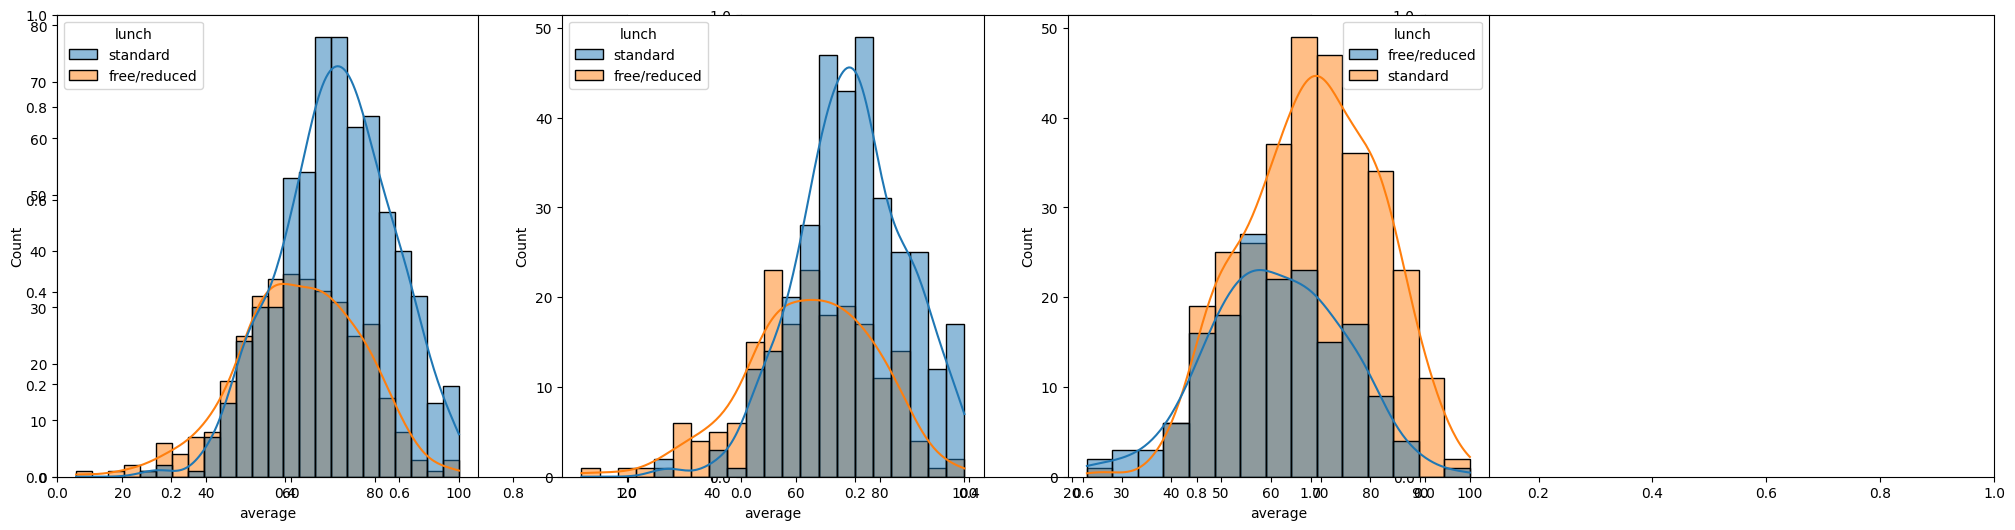

In [51]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights
- Students who had standard lunch performed better than students who had free/reduced lunch.

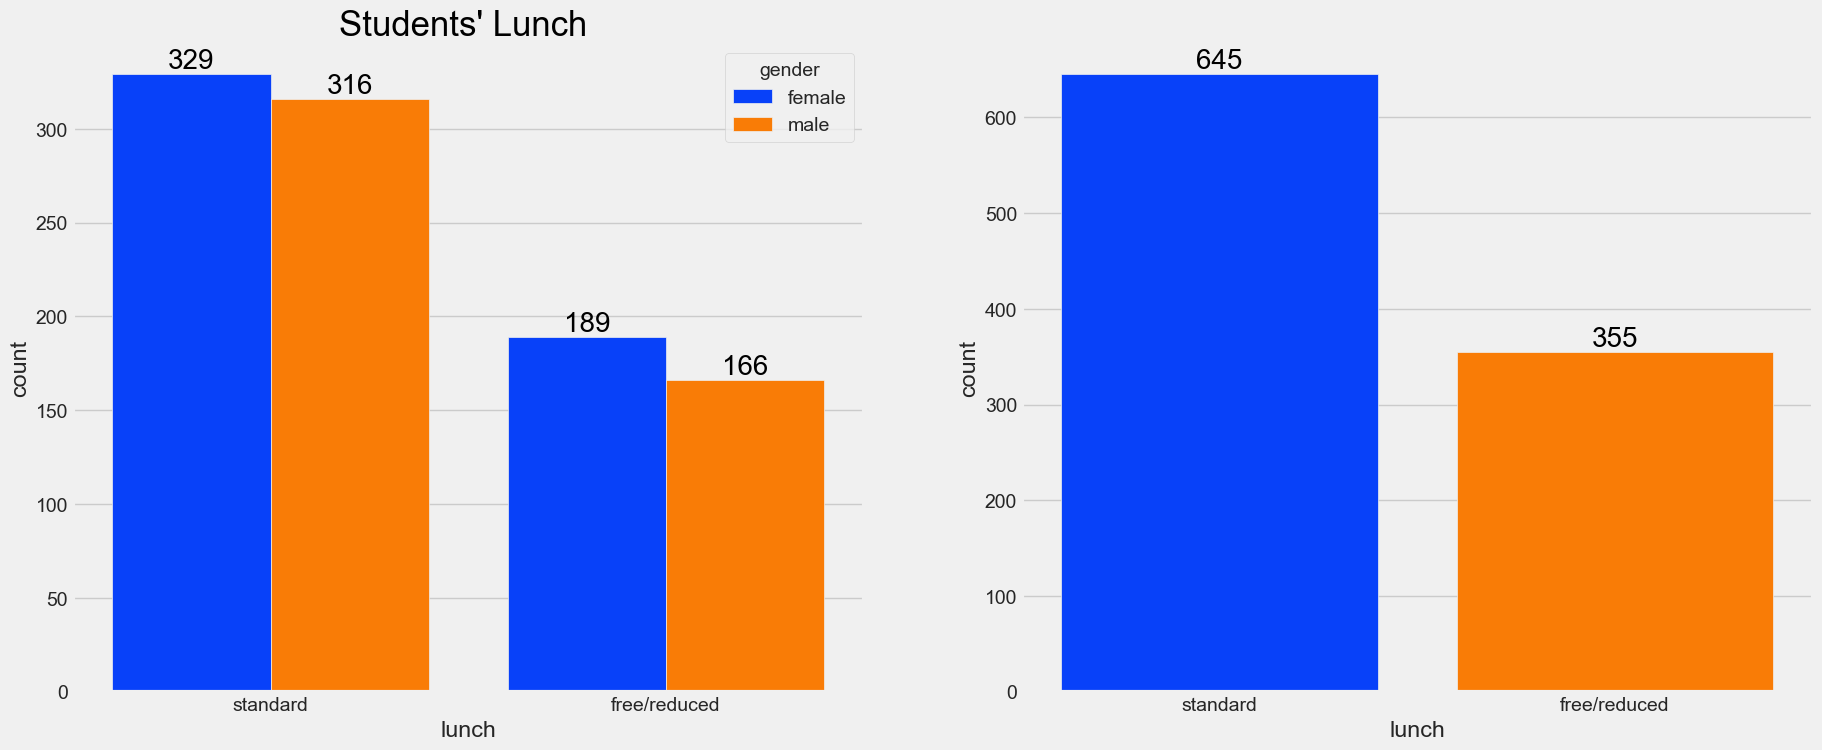

In [108]:
f,ax=plt.subplots(1,2,figsize=(20,8))
  

sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='gender',saturation=0.95,ax=ax[0])
ax[0].set_title("Students' Lunch ",color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)    

Insights 
- Students who had Standard lunch is higher than those who had free lunch
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

## Parental Level of Education vs Average Scores

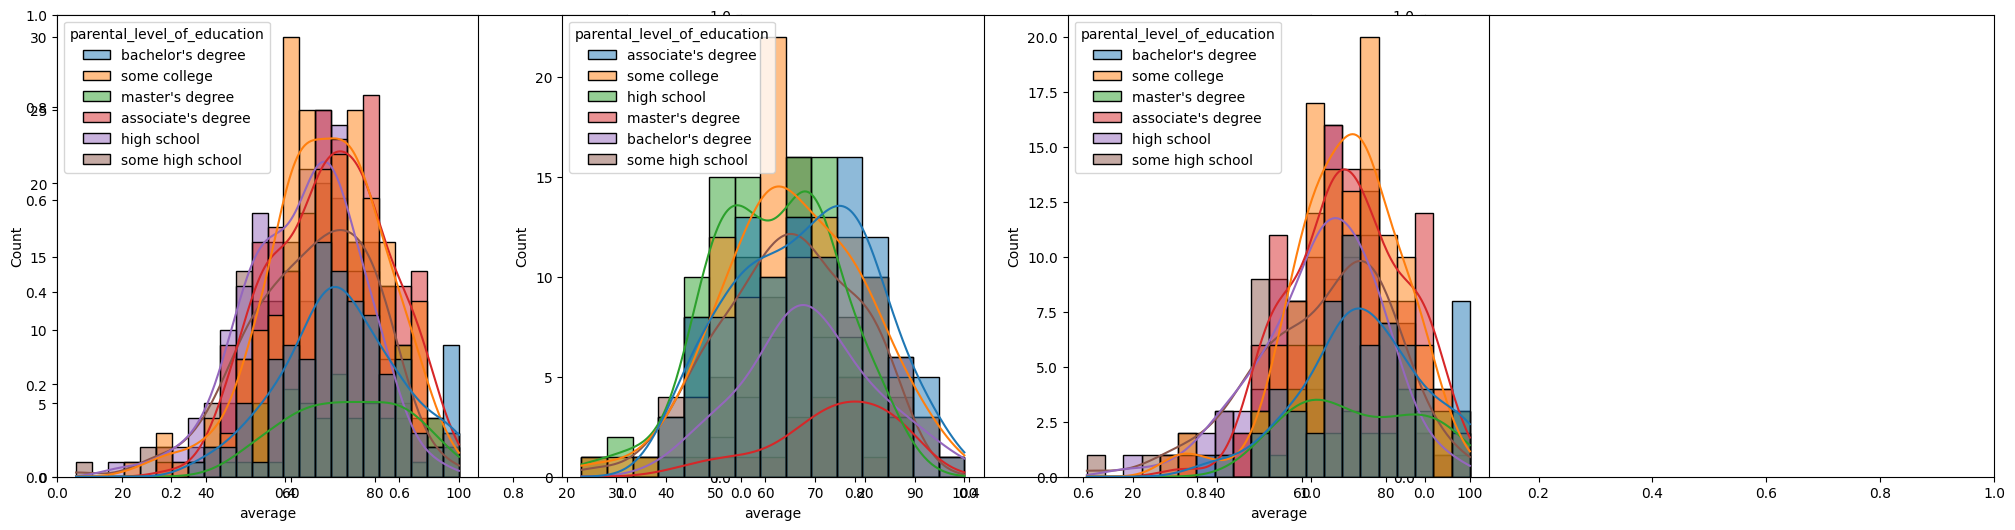

In [52]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

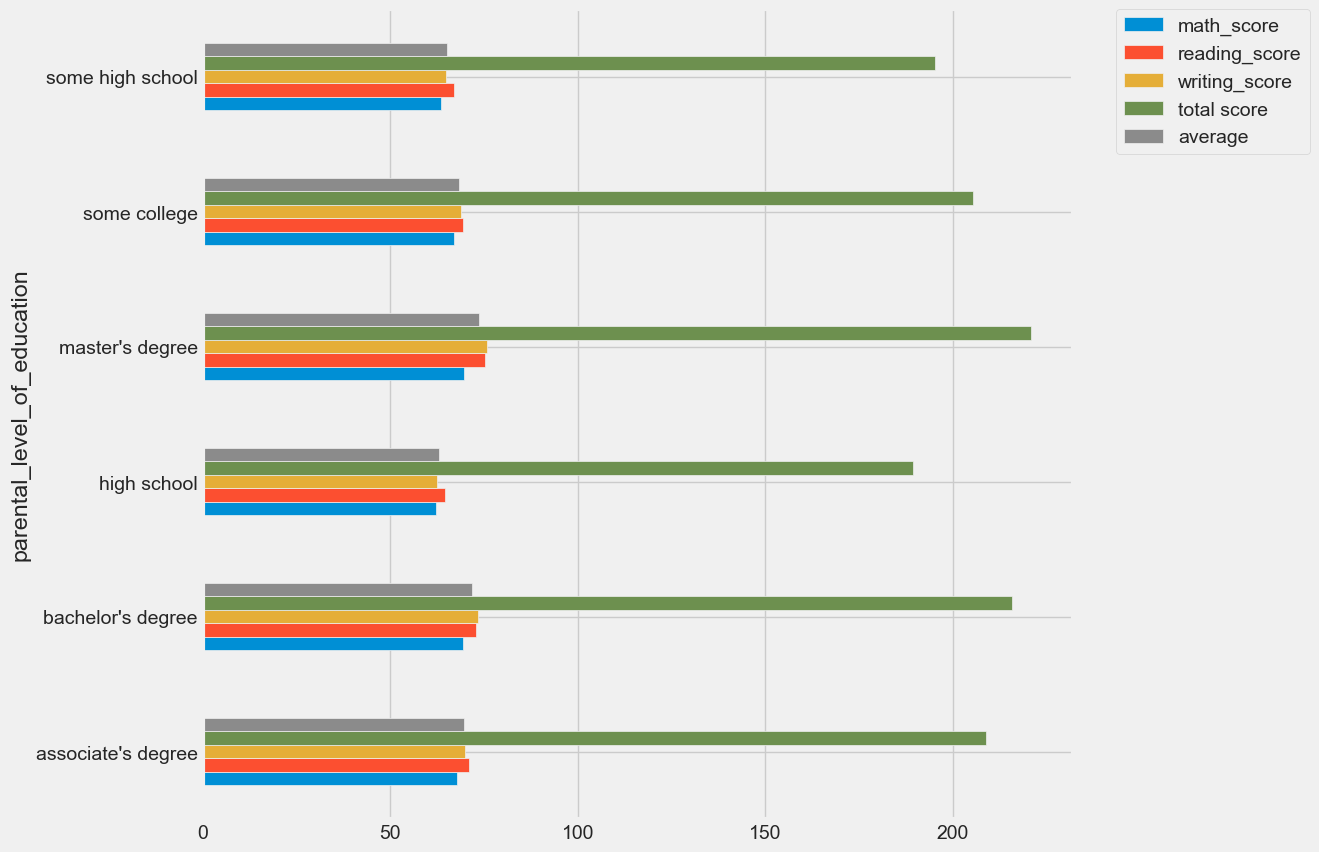

In [103]:
numeric_cols = df.select_dtypes(include=['number']).columns

df.groupby('parental_level_of_education')[numeric_cols].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights
- students whose parents have master's and bachelor's degree have higher scores than the rest of the students.
- students whose parents have high school degree have the lowest scores. 

## Race/Ethnicity vs Average Scores

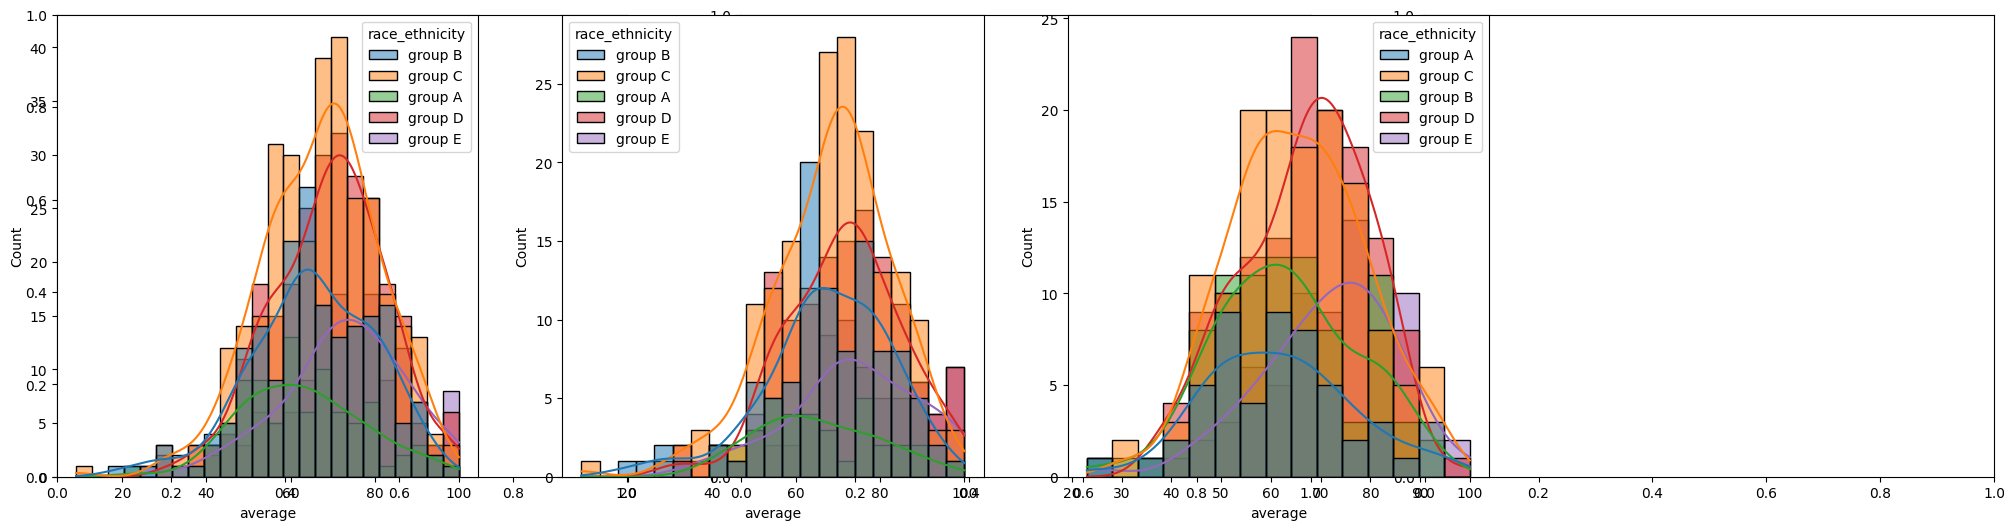

In [54]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

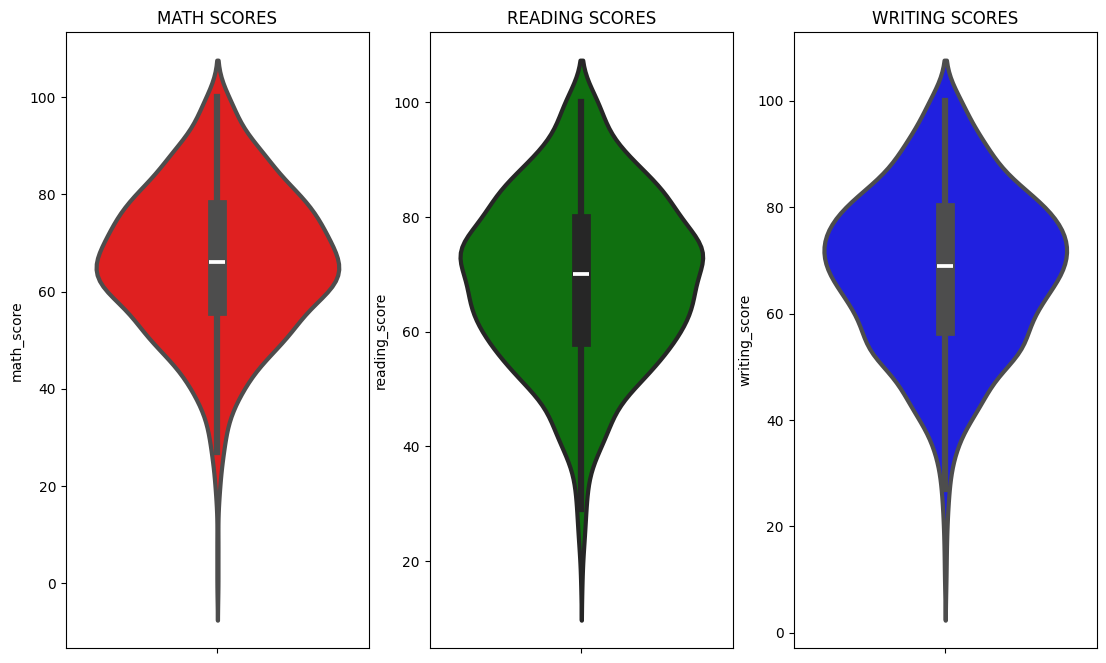

In [57]:
# Maximumum score of students in all three subjects
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

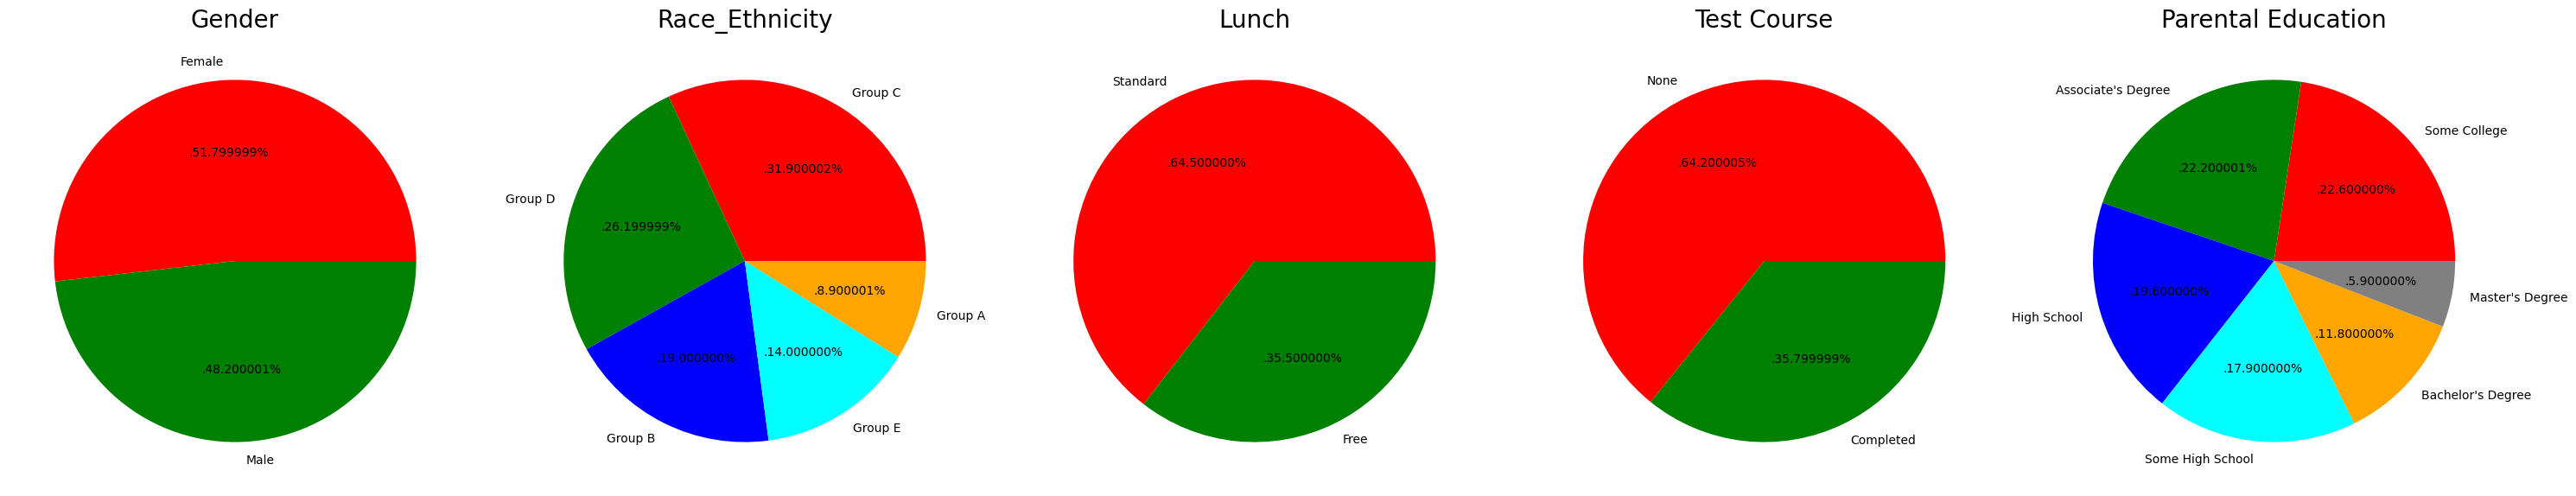

In [60]:
# Multivariate analysis using pieplot
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

Insights
- Number of Male and Female students is almost equal
- Number students is greatest in Group C
- Number of students who had standard lunch is greater
- Number of students who had not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## Does gender have any impact on student's performance?

In [66]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
# Group by 'gender' and calculate the mean for numeric columns
gender_group = df.groupby('gender')[numeric_cols].mean()
print(gender_group)

        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


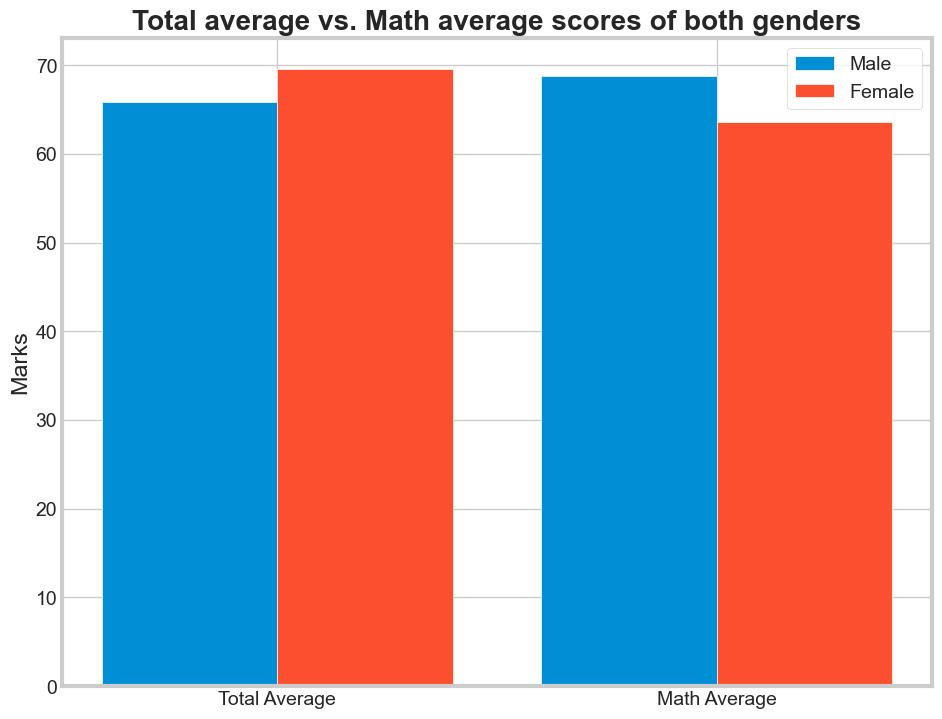

In [87]:
plt.figure(figsize=(10, 8))
X = ['Total Average','Math Average']
female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]
X_axis = np.arange(len(X))  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female') 
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs. Math average scores of both genders", fontweight='bold')
plt.legend()
plt.show()

Insights 
- On an average, females have a higher total score than men.
- On average, males have a higher score than females in Math.

### RACE/EHNICITY COLUMN


How is the distribution based on group?

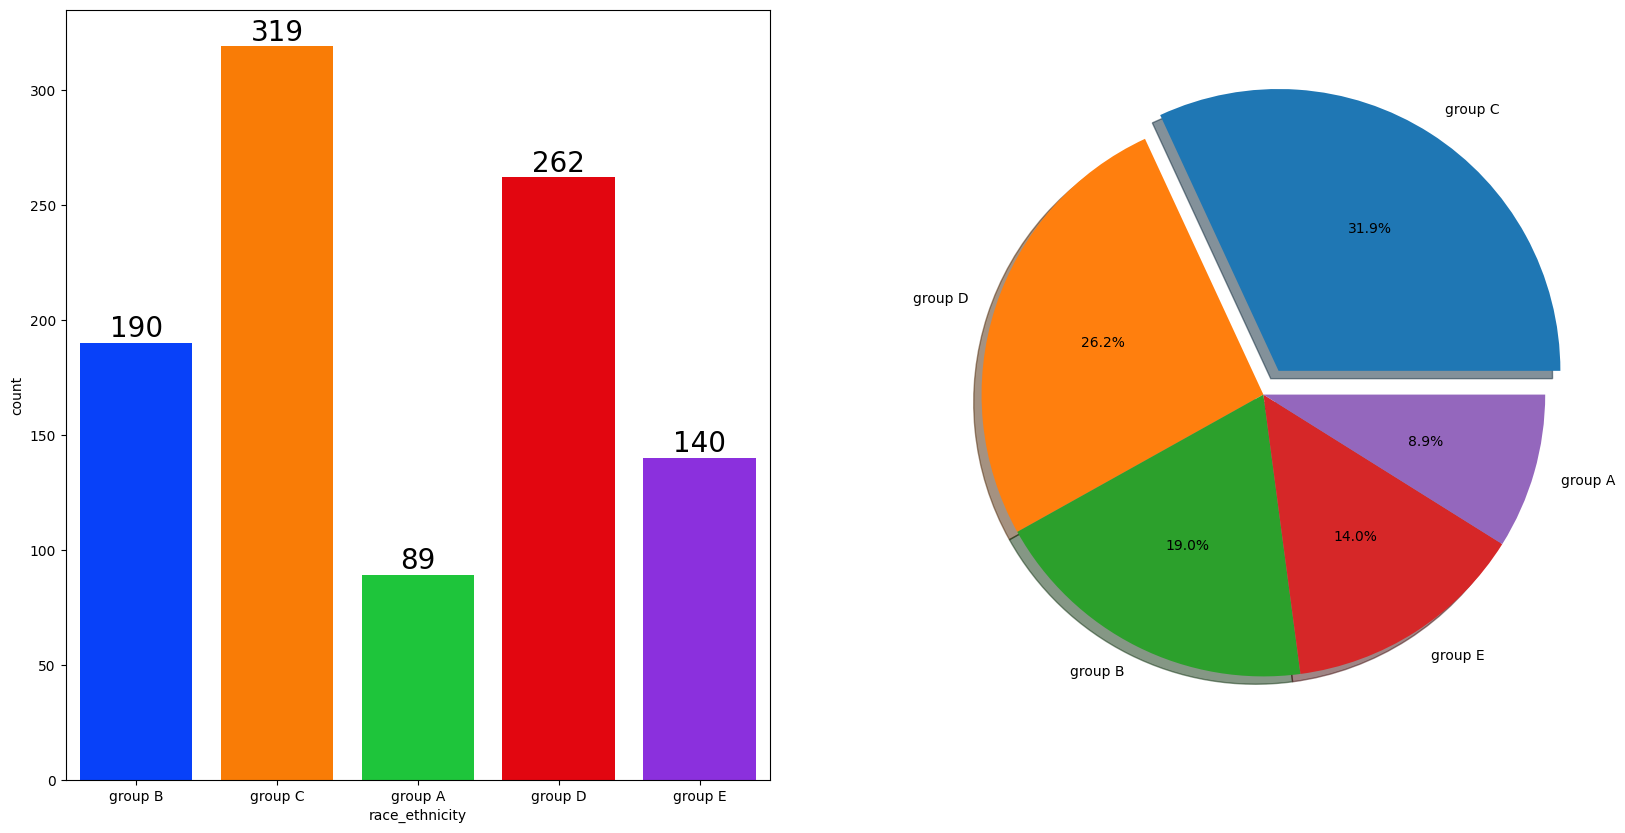

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Insights 
- Group C has the highest number of students.
- Group A has the lowest number of students.

## Does the Race/Ehnicity have any impact on student's performance?

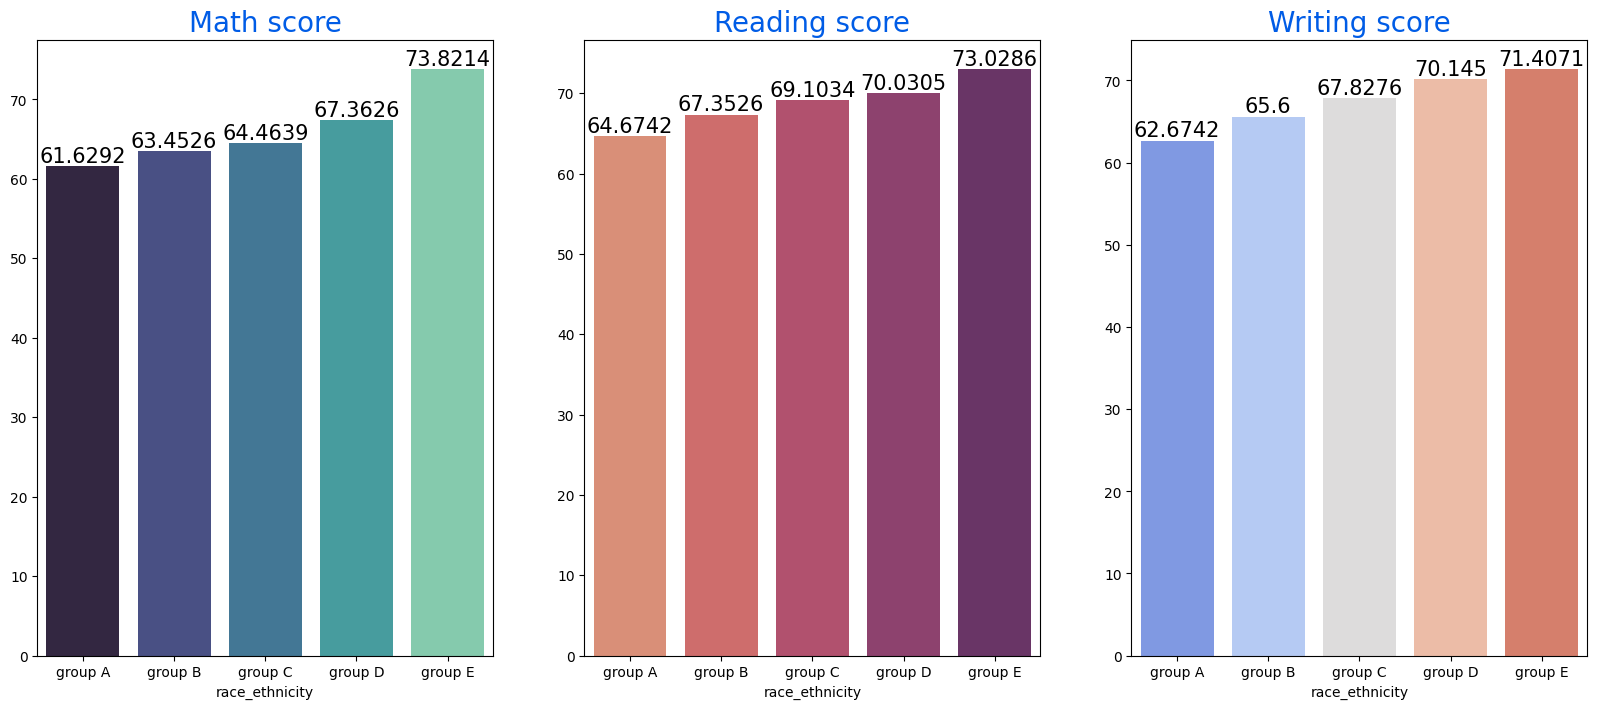

In [70]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights 
- Group E has the highest scores and Group A has the lowest scores in math, reading and writing.


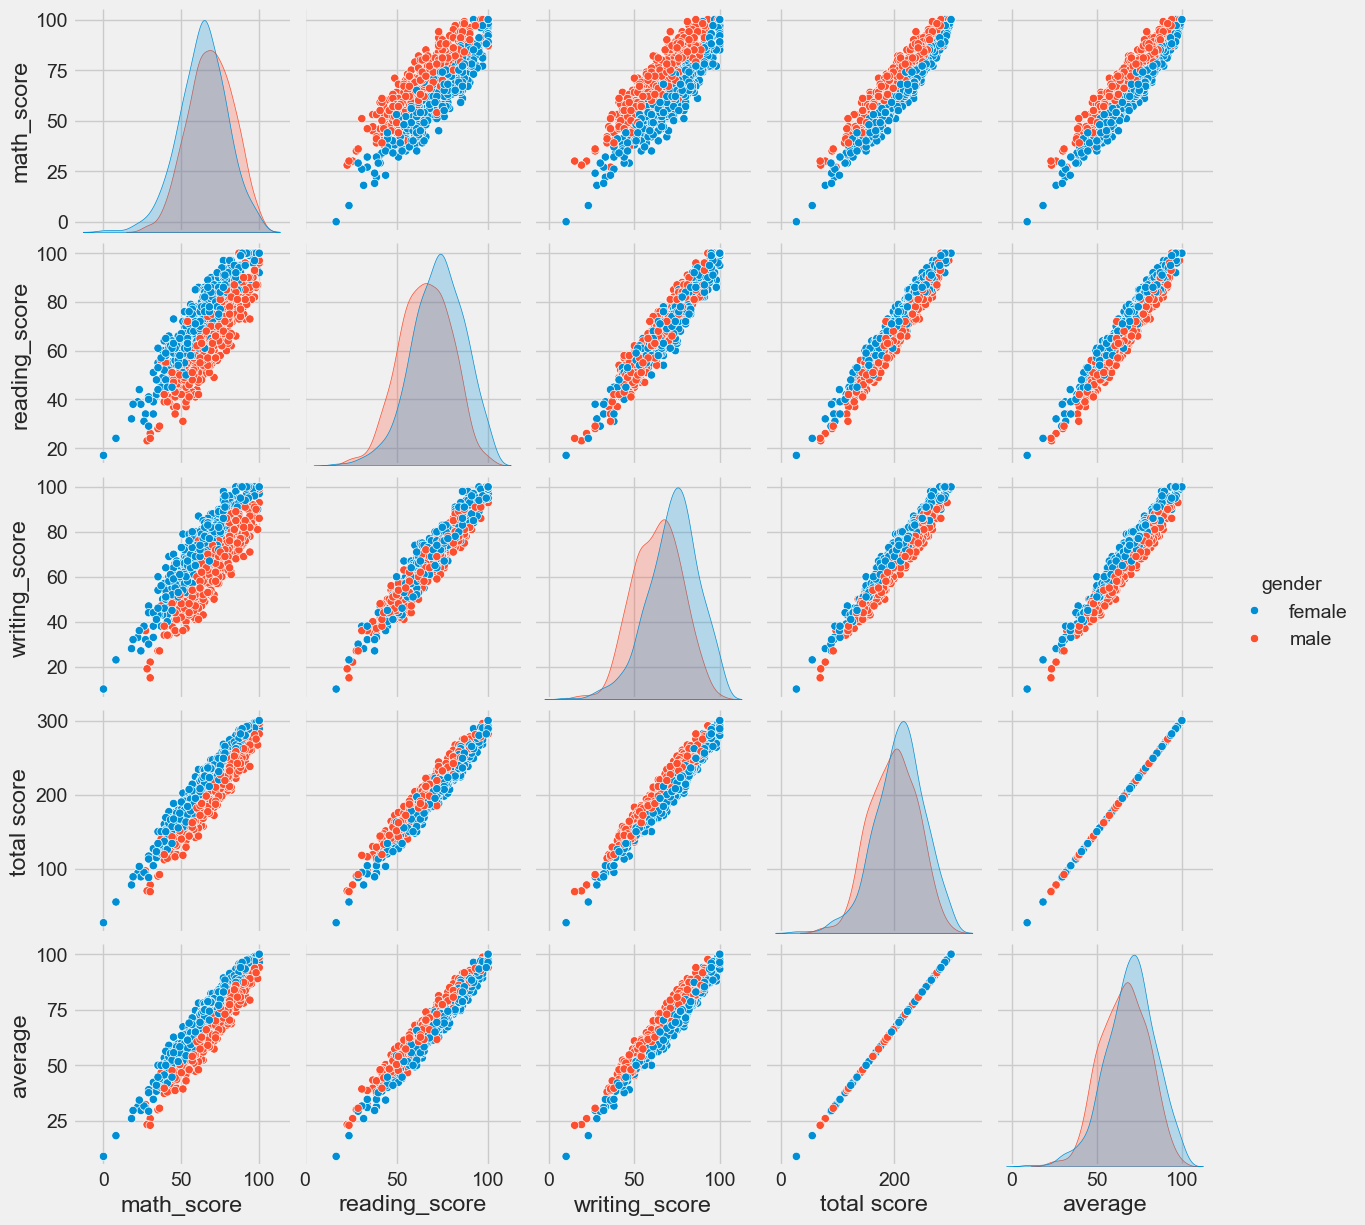

In [106]:
sns.pairplot(df,hue = 'gender')
plt.show()

#Insights
- there is a linear relationship between scores

# Conclusions
- Student's performance is related to lunch, race, and parental level education
- Female students are top-scorers overall
- Male students' scores are higher in math
- Student's performance is not much related to test preparation 